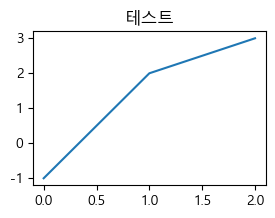

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))
pass


## 데이터 준비

#### 문제정의

> * 많이 발생하는 교통사고 유형은?
> * 사망자, 중상자수가 많은 교통사고 유형은?
> * 사망률, 중상률이 높은 교통사고 유형은??

#### 데이터 수집
https://www.data.go.kr/data/15070282/fileData.do

#### 데이터프레임 생성

In [2]:
# -----------------------------------------
# 데이터프레임 생성
# -----------------------------------------

df = pd.read_csv('data/한국도로교통공단_사고유형별 교통사고 통계_20231231.csv', encoding='cp949')


#### 데이터 확인

In [3]:
# -----------------------------------------
# 데이터프레임 전체 확인
# -----------------------------------------

df

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,차대사람,횡단중,횡단중,13081,419,5868,6999,664
1,차대사람,차도통행중,차도통행중,4507,135,1704,2491,355
2,차대사람,길가장자리구역통행중,길가장자리구역통행중,1985,28,544,1303,190
3,차대사람,보도통행중,보도통행중,2632,24,849,1735,206
4,차대사람,기타,기타,14791,253,4778,9111,1466
5,차대차,정면충돌,정면충돌,7899,162,3498,8781,612
6,차대차,측면충돌,측면충돌,65621,317,15386,77040,5983
7,차대차,후진중충돌,후진중충돌,4017,3,301,4724,254
8,차대차,추돌,추돌,31939,325,7197,46557,3300
9,차대차,기타,기타,43459,234,9735,48179,4740


In [4]:
# -----------------------------------------
# info()
# -----------------------------------------

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   사고유형대분류  18 non-null     object
 1   사고유형중분류  18 non-null     object
 2   사고유형     18 non-null     object
 3   사고건수     18 non-null     int64 
 4   사망자수     18 non-null     int64 
 5   중상자수     18 non-null     int64 
 6   경상자수     18 non-null     int64 
 7   부상신고자수   18 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 1.3+ KB


In [5]:
# -----------------------------------------
# shape
# -----------------------------------------
df.shape

(18, 8)

#### 인덱스 설정


In [6]:
df

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,차대사람,횡단중,횡단중,13081,419,5868,6999,664
1,차대사람,차도통행중,차도통행중,4507,135,1704,2491,355
2,차대사람,길가장자리구역통행중,길가장자리구역통행중,1985,28,544,1303,190
3,차대사람,보도통행중,보도통행중,2632,24,849,1735,206
4,차대사람,기타,기타,14791,253,4778,9111,1466
5,차대차,정면충돌,정면충돌,7899,162,3498,8781,612
6,차대차,측면충돌,측면충돌,65621,317,15386,77040,5983
7,차대차,후진중충돌,후진중충돌,4017,3,301,4724,254
8,차대차,추돌,추돌,31939,325,7197,46557,3300
9,차대차,기타,기타,43459,234,9735,48179,4740


In [7]:
# -----------------------------------------
# 중첩인덱스 설정
#  - ['사고유형대분류', '사고유형']
# -----------------------------------------

df = df.set_index(['사고유형대분류', '사고유형'])
df


사고유형중분류   사고건수  사망자수   중상자수   경상자수  부상신고자수
사고유형대분류 사고유형                                                     
차대사람    횡단중                횡단중  13081   419   5868   6999     664
        차도통행중            차도통행중   4507   135   1704   2491     355
        길가장자리구역통행중  길가장자리구역통행중   1985    28    544   1303     190
        보도통행중            보도통행중   2632    24    849   1735     206
        기타                  기타  14791   253   4778   9111    1466
차대차     정면충돌              정면충돌   7899   162   3498   8781     612
        측면충돌              측면충돌  65621   317  15386  77040    5983
        후진중충돌            후진중충돌   4017     3    301   4724     254
        추돌                  추돌  31939   325   7197  46557    3300
        기타                  기타  43459   234   9735  48179    4740
차량단독    전도                  전도    895    83    329    395     185
        전복                  전복    130    18     48     71      20
        공작물충돌            공작물충돌   2809   307   1163   1619     587
        주/정차차량 충돌    주/정차차량 충돌     23     1     10      7       8
        도로이탈 추락           도로이탈    323    86    182    112      40
        도로이탈 기타           도로이탈    157    21     67     67      39
        기타                  기타   4026   134   1330   2377     592
철길건널목   철길건널목            철길건널목      2     1      0      1       0

In [8]:
# -----------------------------------------
# 인덱스 확인
# -----------------------------------------

df.index

MultiIndex([( '차대사람',        '횡단중'),
            ( '차대사람',      '차도통행중'),
            ( '차대사람', '길가장자리구역통행중'),
            ( '차대사람',      '보도통행중'),
            ( '차대사람',         '기타'),
            (  '차대차',       '정면충돌'),
            (  '차대차',       '측면충돌'),
            (  '차대차',      '후진중충돌'),
            (  '차대차',         '추돌'),
            (  '차대차',         '기타'),
            ( '차량단독',         '전도'),
            ( '차량단독',         '전복'),
            ( '차량단독',      '공작물충돌'),
            ( '차량단독',  '주/정차차량 충돌'),
            ( '차량단독',    '도로이탈 추락'),
            ( '차량단독',    '도로이탈 기타'),
            ( '차량단독',         '기타'),
            ('철길건널목',      '철길건널목')],
           names=['사고유형대분류', '사고유형'])

#### 컬럼 삭제

In [10]:
# -----------------------------------------
# 사고유형중분류 컬럼 삭제
# -----------------------------------------

df = df.drop(['사고유형중분류'], axis = 1)

In [11]:
df

사고건수  사망자수   중상자수   경상자수  부상신고자수
사고유형대분류 사고유형                                         
차대사람    횡단중         13081   419   5868   6999     664
        차도통행중        4507   135   1704   2491     355
        길가장자리구역통행중   1985    28    544   1303     190
        보도통행중        2632    24    849   1735     206
        기타          14791   253   4778   9111    1466
차대차     정면충돌         7899   162   3498   8781     612
        측면충돌        65621   317  15386  77040    5983
        후진중충돌        4017     3    301   4724     254
        추돌          31939   325   7197  46557    3300
        기타          43459   234   9735  48179    4740
차량단독    전도            895    83    329    395     185
        전복            130    18     48     71      20
        공작물충돌        2809   307   1163   1619     587
        주/정차차량 충돌      23     1     10      7       8
        도로이탈 추락       323    86    182    112      40
        도로이탈 기타       157    21     67     67      39
        기타           4026   134   1330   2377     592
철길건널목   철길건널목           2     1      0      1       0

## 분석

#### 사고 유형별 사고건수

In [12]:
# -----------------------------------------
# 사고건수가 많은 순서로 정렬
# -----------------------------------------

df = df.sort_values('사고건수', ascending = False)
df

사고건수  사망자수   중상자수   경상자수  부상신고자수
사고유형대분류 사고유형                                         
차대차     측면충돌        65621   317  15386  77040    5983
        기타          43459   234   9735  48179    4740
        추돌          31939   325   7197  46557    3300
차대사람    기타          14791   253   4778   9111    1466
        횡단중         13081   419   5868   6999     664
차대차     정면충돌         7899   162   3498   8781     612
차대사람    차도통행중        4507   135   1704   2491     355
차량단독    기타           4026   134   1330   2377     592
차대차     후진중충돌        4017     3    301   4724     254
차량단독    공작물충돌        2809   307   1163   1619     587
차대사람    보도통행중        2632    24    849   1735     206
        길가장자리구역통행중   1985    28    544   1303     190
차량단독    전도            895    83    329    395     185
        도로이탈 추락       323    86    182    112      40
        도로이탈 기타       157    21     67     67      39
        전복            130    18     48     71      20
        주/정차차량 충돌      23     1     10      7       8
철길건널목   철길건널목           2     1      0      1       0

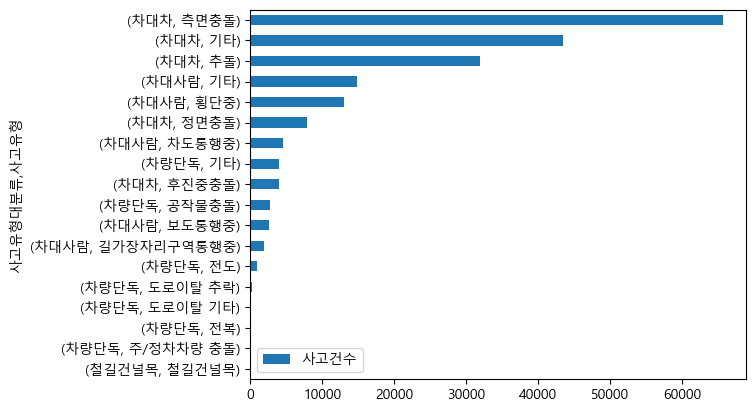

In [14]:
# -----------------------------------------
# 사고건수가 많은 순서로 정렬하여 시각화
# -----------------------------------------
dv = df.plot(kind='barh', y='사고건수')
dv.invert_yaxis()

#### 사고 유형별 사망자수

In [16]:
# -----------------------------------------
# 사망자수가 많은 순서로 정렬
# -----------------------------------------

df = df.sort_values('사망자수', ascending = False)
df

사고건수  사망자수   중상자수   경상자수  부상신고자수
사고유형대분류 사고유형                                         
차대사람    횡단중         13081   419   5868   6999     664
차대차     추돌          31939   325   7197  46557    3300
        측면충돌        65621   317  15386  77040    5983
차량단독    공작물충돌        2809   307   1163   1619     587
차대사람    기타          14791   253   4778   9111    1466
차대차     기타          43459   234   9735  48179    4740
        정면충돌         7899   162   3498   8781     612
차대사람    차도통행중        4507   135   1704   2491     355
차량단독    기타           4026   134   1330   2377     592
        도로이탈 추락       323    86    182    112      40
        전도            895    83    329    395     185
차대사람    길가장자리구역통행중   1985    28    544   1303     190
        보도통행중        2632    24    849   1735     206
차량단독    도로이탈 기타       157    21     67     67      39
        전복            130    18     48     71      20
차대차     후진중충돌        4017     3    301   4724     254
차량단독    주/정차차량 충돌      23     1     10      7       8
철길건널목   철길건널목           2     1      0      1       0

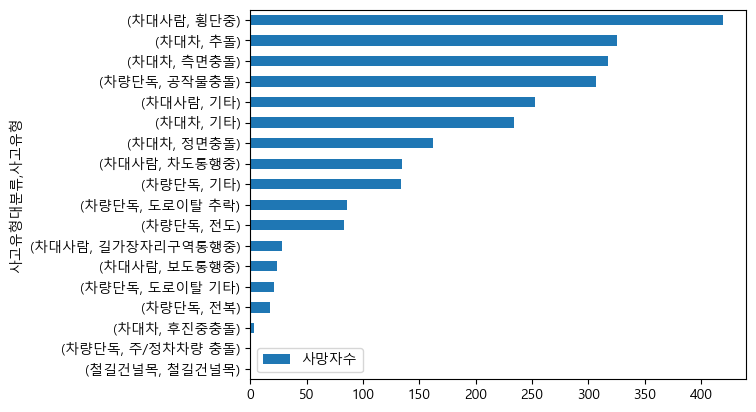

In [17]:
# -----------------------------------------
# 사망자수가 많은 순서로 정렬하여 시각화
# -----------------------------------------

dv = df.plot(kind='barh', y='사망자수')
dv.invert_yaxis()


#### 사고 유형별 중상자수

In [18]:
# -----------------------------------------
# 중상자수가 많은 순서로 정렬
# -----------------------------------------

df = df.sort_values('중상자수',ascending = False)
df


사고건수  사망자수   중상자수   경상자수  부상신고자수
사고유형대분류 사고유형                                         
차대차     측면충돌        65621   317  15386  77040    5983
        기타          43459   234   9735  48179    4740
        추돌          31939   325   7197  46557    3300
차대사람    횡단중         13081   419   5868   6999     664
        기타          14791   253   4778   9111    1466
차대차     정면충돌         7899   162   3498   8781     612
차대사람    차도통행중        4507   135   1704   2491     355
차량단독    기타           4026   134   1330   2377     592
        공작물충돌        2809   307   1163   1619     587
차대사람    보도통행중        2632    24    849   1735     206
        길가장자리구역통행중   1985    28    544   1303     190
차량단독    전도            895    83    329    395     185
차대차     후진중충돌        4017     3    301   4724     254
차량단독    도로이탈 추락       323    86    182    112      40
        도로이탈 기타       157    21     67     67      39
        전복            130    18     48     71      20
        주/정차차량 충돌      23     1     10      7       8
철길건널목   철길건널목           2     1      0      1       0

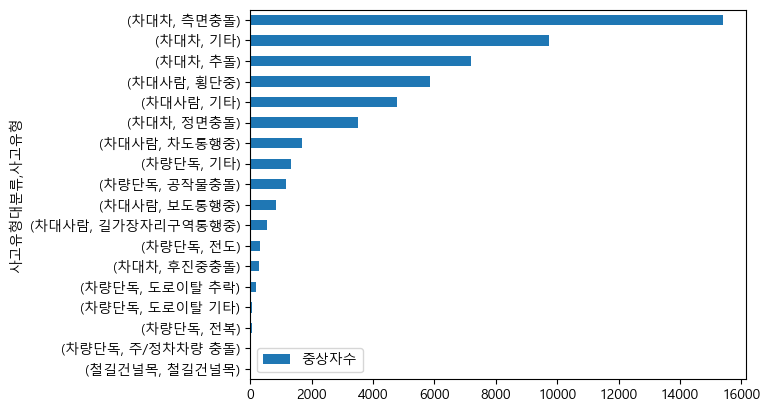

In [19]:
# -----------------------------------------
# 중상자수가 많은 순서로 정렬하여 시각화
# -----------------------------------------

dv = df.plot(kind='barh', y='중상자수')
dv.invert_yaxis()

#### 사고 유형별 사망률

In [20]:
# -----------------------------------------
# 파생컬럼 추거
# -----------------------------------------

df['사망률'] = df['사망자수']/df['사고건수']
df

사고건수  사망자수   중상자수   경상자수  부상신고자수       사망률
사고유형대분류 사고유형                                                   
차대차     측면충돌        65621   317  15386  77040    5983  0.004831
        기타          43459   234   9735  48179    4740  0.005384
        추돌          31939   325   7197  46557    3300  0.010176
차대사람    횡단중         13081   419   5868   6999     664  0.032031
        기타          14791   253   4778   9111    1466  0.017105
차대차     정면충돌         7899   162   3498   8781     612  0.020509
차대사람    차도통행중        4507   135   1704   2491     355  0.029953
차량단독    기타           4026   134   1330   2377     592  0.033284
        공작물충돌        2809   307   1163   1619     587  0.109292
차대사람    보도통행중        2632    24    849   1735     206  0.009119
        길가장자리구역통행중   1985    28    544   1303     190  0.014106
차량단독    전도            895    83    329    395     185  0.092737
차대차     후진중충돌        4017     3    301   4724     254  0.000747
차량단독    도로이탈 추락       323    86    182    112      40  0.266254
        도로이탈 기타       157    21     67     67      39  0.133758
        전복            130    18     48     71      20  0.138462
        주/정차차량 충돌      23     1     10      7       8  0.043478
철길건널목   철길건널목           2     1      0      1       0  0.500000

In [21]:
# -----------------------------------------
# 사망률 높은 순으로 정렬
# -----------------------------------------
df = df.sort_values('사망률',ascending = False)
df


사고건수  사망자수   중상자수   경상자수  부상신고자수       사망률
사고유형대분류 사고유형                                                   
철길건널목   철길건널목           2     1      0      1       0  0.500000
차량단독    도로이탈 추락       323    86    182    112      40  0.266254
        전복            130    18     48     71      20  0.138462
        도로이탈 기타       157    21     67     67      39  0.133758
        공작물충돌        2809   307   1163   1619     587  0.109292
        전도            895    83    329    395     185  0.092737
        주/정차차량 충돌      23     1     10      7       8  0.043478
        기타           4026   134   1330   2377     592  0.033284
차대사람    횡단중         13081   419   5868   6999     664  0.032031
        차도통행중        4507   135   1704   2491     355  0.029953
차대차     정면충돌         7899   162   3498   8781     612  0.020509
차대사람    기타          14791   253   4778   9111    1466  0.017105
        길가장자리구역통행중   1985    28    544   1303     190  0.014106
차대차     추돌          31939   325   7197  46557    3300  0.010176
차대사람    보도통행중        2632    24    849   1735     206  0.009119
차대차     기타          43459   234   9735  48179    4740  0.005384
        측면충돌        65621   317  15386  77040    5983  0.004831
        후진중충돌        4017     3    301   4724     254  0.000747

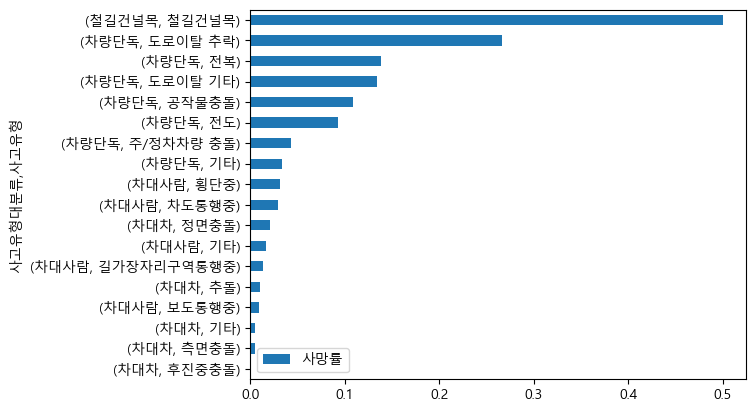

In [22]:
# -----------------------------------------
# 사망률 높은 순으로 정렬하여 시각화
# -----------------------------------------
dv = df.plot(kind='barh',y = '사망률')
dv.invert_yaxis()

#### 사고 유형별 중상률

In [23]:
# -----------------------------------------
# 파생컬럼 추가
# -----------------------------------------

df['중상률'] = df['중상자수']/df['사고건수']
df

사고건수  사망자수   중상자수   경상자수  부상신고자수       사망률       중상률
사고유형대분류 사고유형                                                             
철길건널목   철길건널목           2     1      0      1       0  0.500000  0.000000
차량단독    도로이탈 추락       323    86    182    112      40  0.266254  0.563467
        전복            130    18     48     71      20  0.138462  0.369231
        도로이탈 기타       157    21     67     67      39  0.133758  0.426752
        공작물충돌        2809   307   1163   1619     587  0.109292  0.414026
        전도            895    83    329    395     185  0.092737  0.367598
        주/정차차량 충돌      23     1     10      7       8  0.043478  0.434783
        기타           4026   134   1330   2377     592  0.033284  0.330353
차대사람    횡단중         13081   419   5868   6999     664  0.032031  0.448590
        차도통행중        4507   135   1704   2491     355  0.029953  0.378079
차대차     정면충돌         7899   162   3498   8781     612  0.020509  0.442841
차대사람    기타          14791   253   4778   9111    1466  0.017105  0.323034
        길가장자리구역통행중   1985    28    544   1303     190  0.014106  0.274055
차대차     추돌          31939   325   7197  46557    3300  0.010176  0.225336
차대사람    보도통행중        2632    24    849   1735     206  0.009119  0.322568
차대차     기타          43459   234   9735  48179    4740  0.005384  0.224004
        측면충돌        65621   317  15386  77040    5983  0.004831  0.234468
        후진중충돌        4017     3    301   4724     254  0.000747  0.074932

In [24]:
# -----------------------------------------
# 중상률 높은 순으로 정렬하여 시각화
# -----------------------------------------

df = df.sort_values('중상률',ascending = False)
df

사고건수  사망자수   중상자수   경상자수  부상신고자수       사망률       중상률
사고유형대분류 사고유형                                                             
차량단독    도로이탈 추락       323    86    182    112      40  0.266254  0.563467
차대사람    횡단중         13081   419   5868   6999     664  0.032031  0.448590
차대차     정면충돌         7899   162   3498   8781     612  0.020509  0.442841
차량단독    주/정차차량 충돌      23     1     10      7       8  0.043478  0.434783
        도로이탈 기타       157    21     67     67      39  0.133758  0.426752
        공작물충돌        2809   307   1163   1619     587  0.109292  0.414026
차대사람    차도통행중        4507   135   1704   2491     355  0.029953  0.378079
차량단독    전복            130    18     48     71      20  0.138462  0.369231
        전도            895    83    329    395     185  0.092737  0.367598
        기타           4026   134   1330   2377     592  0.033284  0.330353
차대사람    기타          14791   253   4778   9111    1466  0.017105  0.323034
        보도통행중        2632    24    849   1735     206  0.009119  0.322568
        길가장자리구역통행중   1985    28    544   1303     190  0.014106  0.274055
차대차     측면충돌        65621   317  15386  77040    5983  0.004831  0.234468
        추돌          31939   325   7197  46557    3300  0.010176  0.225336
        기타          43459   234   9735  48179    4740  0.005384  0.224004
        후진중충돌        4017     3    301   4724     254  0.000747  0.074932
철길건널목   철길건널목           2     1      0      1       0  0.500000  0.000000

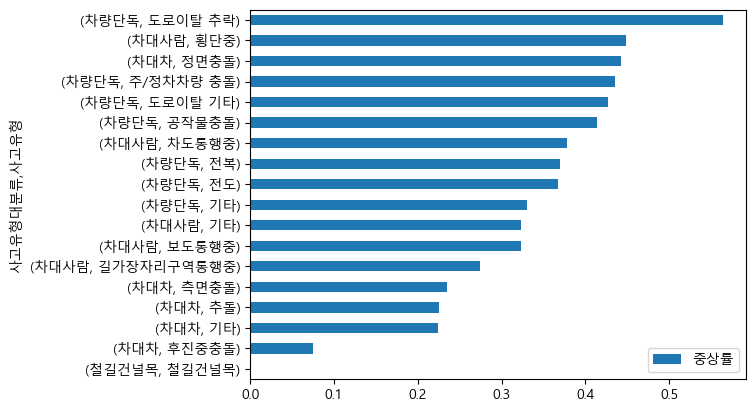

In [56]:
# -----------------------------------------
# 중상률 높은 순으로 정렬하여 시각화
# -----------------------------------------

dv = df.plot(kind='barh',y = '중상률')
dv.invert_yaxis()

In [33]:
df['위험도score'] = (df['부상신고자수'] + df['경상자수']*2 + df['중상자수']*4 + df['사망자수']*10) / df['사고건수']
df.sort_values('위험도score', ascending = False, inplace = True)
df

사고건수  사망자수   중상자수   경상자수  부상신고자수       사망률       중상률  \
사고유형대분류 사고유형                                                                
철길건널목   철길건널목           2     1      0      1       0  0.500000  0.000000   
차량단독    도로이탈 추락       323    86    182    112      40  0.266254  0.563467   
차대차     정면충돌         7899   162   3498   8781     612  0.020509  0.442841   
차량단독    도로이탈 기타       157    21     67     67      39  0.133758  0.426752   
        공작물충돌        2809   307   1163   1619     587  0.109292  0.414026   
        전복            130    18     48     71      20  0.138462  0.369231   
차대차     추돌          31939   325   7197  46557    3300  0.010176  0.225336   
차량단독    전도            895    83    329    395     185  0.092737  0.367598   
차대차     측면충돌        65621   317  15386  77040    5983  0.004831  0.234468   
        기타          43459   234   9735  48179    4740  0.005384  0.224004   
차대사람    횡단중         13081   419   5868   6999     664  0.032031  0.448590   
차량단독    주/정차차량 충돌      23     1     10      7       8  0.043478  0.434783   
차대사람    차도통행중        4507   135   1704   2491     355  0.029953  0.378079   
차량단독    기타           4026   134   1330   2377     592  0.033284  0.330353   
차대사람    기타          14791   253   4778   9111    1466  0.017105  0.323034   
        보도통행중        2632    24    849   1735     206  0.009119  0.322568   
차대차     후진중충돌        4017     3    301   4724     254  0.000747  0.074932   
차대사람    길가장자리구역통행중   1985    28    544   1303     190  0.014106  0.274055   

                    위험도score  
사고유형대분류 사고유형                  
철길건널목   철길건널목       6.000000  
차량단독    도로이탈 추락     5.733746  
차대차     정면충돌        4.277250  
차량단독    도로이탈 기타     4.146497  
        공작물충돌       4.110716  
        전복          4.107692  
차대차     추돌          4.021792  
차량단독    전도          3.487151  
차대차     측면충돌        3.425382  
        기타          3.276145  
차대사람    횡단중         3.235532  
차량단독    주/정차차량 충돌   3.130435  
차대사람    차도통행중       2.996006  
차량단독    기타          2.982116  
차대사람    기타          2.794267  
        보도통행중       2.778116  
차대차     후진중충돌       2.722430  
차대사람    길가장자리구역통행중  2.645844

## 결론 도출
* 산출물 업로드
    * 시각화 결과 캡처
    * 분석결과 정리 

# 교통사고 분석 결과

## 1. 사고 현황
- **사고건수**: 차대차(특히 측면충돌)가 가장 많음.  
- **사망자수**: 차대사람, 횡단 중 보행자가 가장 많음.  
- **중상자수**: 차대차, 측면충돌이 최다.  
- **사망률**: 철길건널목 사고가 50%(2건 중 1건 사망)로 가장 높음.  
- **중상률**: 차량단독 중 도로이탈 추락이 약 56%로 가장 높음. 반면 차대차·측면충돌은 약 23% 수준.  

---

## 2. 해석
1. **차대차·측면충돌**  
   - 전체 사고의 절반 가까이를 차지하며 중상자수도 많음.  
   - 중상률 자체는 낮지만 사고 건수가 많아 결과적으로 중상자 발생이 크다.  
   - → 사고량을 줄이면 전체 교통사고 감소 효과가 클 것으로 예상됨.  

2. **차대사람·횡단 중**  
   - 사망자수가 가장 많아 **가장 위험한 유형**으로 분류 가능.  
   - 보행자 교통정리·안전 정책 강화가 필요.  

3. **철길건널목 사고**  
   - 2건 중 1건이 사망 → **사망률 50%**라는 극단적 수치.  
   - 건수는 적지만 발생 시 치명도가 높으므로 **소수 고위험군 관리** 필요.  

4. **차량단독·도로이탈 추락**  
   - 중상률 **56%**로 최상위.  
   - 같은 차량단독 사고에서도 도로이탈 기타(4.15점), 공작물 충돌(4.11점), 전복(4.11점)도 위험도가 높음.  
   - → 운전자 단독 사고 예방을 위한 도로 안전 시설·가드레일 강화 필요.  

---

## 3. 위험도 Score 평가
산출식: (부상신고자수 + 경상자수×2 + 중상자수×4 + 사망자수×10) / 사고건수



**위험도 Score 4점 이상**으로 분류된 사고 유형은 다음과 같다:

| 사고 유형 | 세부 유형     | 위험도 Score |
|-----------|---------------|--------------|
| 철길건널목 | 철길건널목    | **6.000** |
| 차량단독 | 도로이탈 추락  | **5.734** |
| 차대차   | 정면충돌      | **4.277** |
| 차량단독 | 도로이탈 기타  | **4.146** |
| 차량단독 | 공작물 충돌    | **4.111** |
| 차량단독 | 전복          | **4.108** |
| 차대차   | 추돌          | **4.022** |

➡ 위험도가 높은 유형은 실제로도 **치명적인 결과를 동반하는 사고**들임을 확인할 수 있다.  
- 철길건널목: 드물지만 치명적  
- 도로이탈·전복류: 운전자 단독사고 → 고위험  
- 정면충돌·추돌: 사고 자체가 잦고, 피해 정도도 크다  

---

## 4. 종합 결론
- **빈도 높은 사고(차대차·측면충돌)** → 교통사고 전체 감소를 위한 1순위 관리 대상  
- **사망자 많은 사고(차대사람·횡단중)** → 보행자 안전 대책이 시급  
- **위험도 높은 사고(철길건널목·도로이탈 추락·정면충돌 등)** → 건수는 적어도 치명도가 높아 별도의 고위험군 관리 필요  

따라서 정책 방향은  
1) 다발 사고 유형 관리(사고 건수 자체를 줄이기),  
2) 보행자 안전 강화(사망자 감소),  
3) 소수 고위험군 집중 대비(치명도 감소)  
세 축으로 나누어 접근하는 것이 적절하다.  
